# Sentiment Analysis on E-Commerce Data

## Table of Contents

1. Data Preparation
2. Exploratory Data Analysis
3. Data Preprocessing
4. Text Vectorization
5. Model Building
6. Model Evaluation

## Data Preparation

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv("Amazon Product Review.txt", sep=",")

In [27]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,2015-08-31,1
1,US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,2015-08-31,0
2,US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,Excellent unit. The versatility of this table...,2015-08-31,1
3,US,19844868,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,2015-08-31,1
4,US,1189852,R3RL4C8YP2ZCJL,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,All Amazon products continue to meet my expect...,2015-08-31,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30846 entries, 0 to 30845
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        30846 non-null  object
 1   customer_id        30846 non-null  int64 
 2   review_id          30846 non-null  object
 3   product_id         30846 non-null  object
 4   product_parent     30846 non-null  int64 
 5   product_title      30846 non-null  object
 6   product_category   30846 non-null  object
 7   star_rating        30846 non-null  int64 
 8   helpful_votes      30846 non-null  int64 
 9   total_votes        30846 non-null  int64 
 10  vine               30846 non-null  object
 11  verified_purchase  30846 non-null  object
 12  review_headline    30846 non-null  object
 13  review_body        30846 non-null  object
 14  review_date        30846 non-null  object
 15  sentiment          30846 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 3.

In [5]:
df.to_csv('amazon reviews.csv', index=False)

In [38]:
df.drop(['review_id', 'customer_id', 'review_body', 'product_id', 'product_title'], axis=1, inplace=True)

In [8]:
df.head()

,marketplace,product_parent,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_date,sentiment
0,US,2693241,PC,5,0,0,N,Y,Five Stars,2015-08-31,1
1,US,2693241,PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,2015-08-31,0
2,US,2693241,PC,5,0,0,N,Y,Well thought out device,2015-08-31,1
3,US,2693241,PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,2015-08-31,1
4,US,2693241,PC,5,0,0,N,Y,Five Stars,2015-08-31,1


## Exploratory Data Analysis

In [9]:
df.describe(include='all')

,marketplace,product_parent,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_date,sentiment
count,30846,30846.0,30846,30846.000000,30846.00000,30846.000000,30846,30846,30846,30846,30846.000000
unique,1,NaN,1,NaN,NaN,NaN,1,2,15716,333,NaN
top,US,NaN,PC,NaN,NaN,NaN,N,Y,Five Stars,2015-01-04,NaN
freq,30846,NaN,30846,NaN,NaN,NaN,30846,26848,8975,1420,NaN
mean,NaN,2693241.0,NaN,4.336154,0.68641,0.895027,NaN,NaN,NaN,NaN,0.835343
std,NaN,0.0,NaN,1.120716,30.74337,32.356354,NaN,NaN,NaN,NaN,0.370876
min,NaN,2693241.0,NaN,1.000000,0.00000,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,NaN,2693241.0,NaN,4.000000,0.00000,0.000000,NaN,NaN,NaN,NaN,1.000000
50%,NaN,2693241.0,NaN,5.000000,0.00000,0.000000,NaN,NaN,NaN,NaN,1.000000
75%,NaN,2693241.0,NaN,5.000000,0.00000,0.000000,NaN,NaN,NaN,NaN,1.000000


([], [])

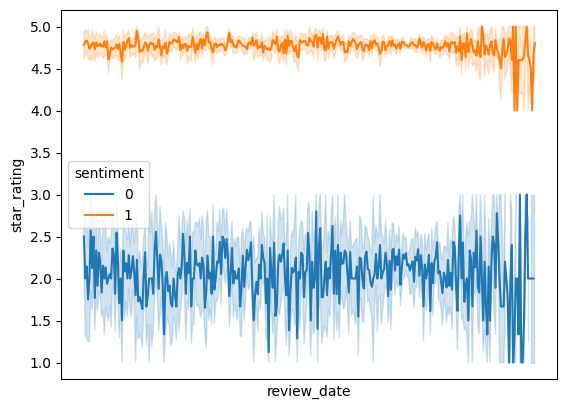

In [19]:
sns.lineplot(x='review_date', y='star_rating', hue='sentiment', data=df)
plt.xticks([])

<Axes: xlabel='verified_purchase', ylabel='sentiment'>

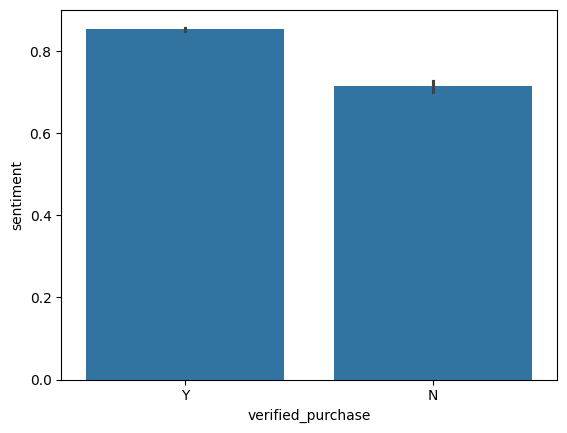

In [20]:
sns.barplot(x='verified_purchase', y='sentiment', data=df)

<Axes: xlabel='helpful_votes', ylabel='total_votes'>

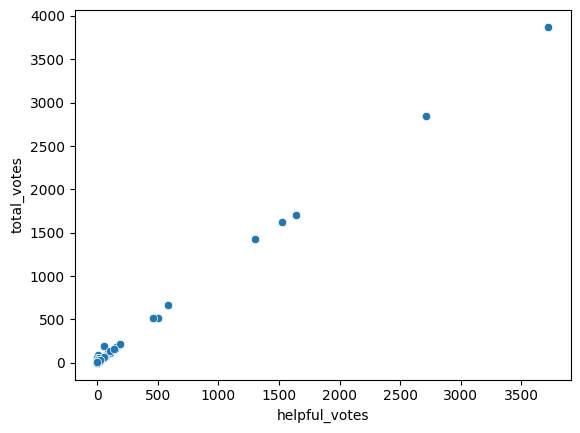

In [21]:
sns.scatterplot(x='helpful_votes', y='total_votes', data=df)

In [39]:
df.corr()

<ipython-input-39-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,product_parent,star_rating,helpful_votes,total_votes,sentiment
product_parent,NaN,NaN,NaN,NaN,NaN
star_rating,NaN,1.000000,-0.011161,-0.020296,0.885863
helpful_votes,NaN,-0.011161,1.000000,0.999085,-0.009823
total_votes,NaN,-0.020296,0.999085,1.000000,-0.018136
sentiment,NaN,0.885863,-0.009823,-0.018136,1.000000


## Data Preprocessing

In [40]:
df.drop(['marketplace', 'product_category', 'vine', 'review_date', 'helpful_votes', 'product_parent'], axis=1, inplace=True)

In [41]:
df.head()

,star_rating,total_votes,verified_purchase,review_headline,sentiment
0,5,0,Y,Five Stars,1
1,3,0,N,Lots of ads Slow processing speed Occasionally...,0
2,5,0,Y,Well thought out device,1
3,4,0,N,Not all apps/games we were looking forward to ...,1
4,5,0,Y,Five Stars,1


In [42]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def preprocess_text(text):
  text = re.sub('[^a-zA-Z]', ' ', text)
  text = text.lower()
  tokens = text.split()
  stop_words = set(stopwords.words('english'))
  tokens = [token for token in tokens if token not in stop_words]
  text = ' '.join(tokens)
  return text

df['review_headline'] = df['review_headline'].apply(preprocess_text)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,star_rating,total_votes,verified_purchase,review_headline,sentiment
0,5,0,Y,five stars,1
1,3,0,N,lots ads slow processing speed occasionally sh...,0
2,5,0,Y,well thought device,1
3,4,0,N,apps games looking forward using compatible ta...,1
4,5,0,Y,five stars,1


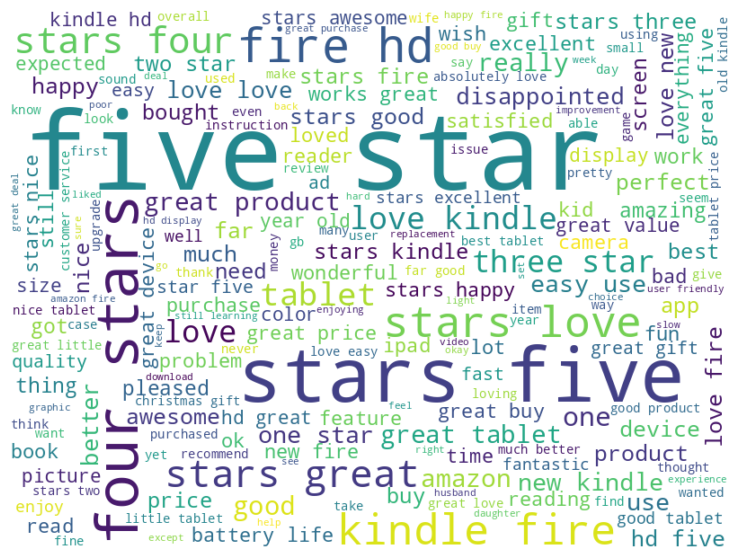

In [45]:
from wordcloud import WordCloud

text = " ".join(df['review_headline'].tolist())

wordcloud = WordCloud(width=800, height=600, background_color="white").generate(text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Text Vectorization

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

text_column = df['review_headline']

tfidf_matrix = vectorizer.fit_transform(text_column)

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['sentiment'], test_size=0.25, random_state=3)

## Model Building

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, classification_report

In [53]:
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(accuracy_score(y_test, pred))

0.8974325726141079


In [55]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(accuracy_score(y_test, pred))

0.8892634854771784


In [56]:
model = SVC()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(accuracy_score(y_test, pred))

0.9026192946058091


In [57]:
model = MultinomialNB()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(accuracy_score(y_test, pred))

0.8952282157676349


## Model Evaluation

In [60]:
model = SVC(probability=True)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.53      0.65      1291
           1       0.91      0.98      0.94      6421

    accuracy                           0.90      7712
   macro avg       0.87      0.75      0.80      7712
weighted avg       0.90      0.90      0.89      7712



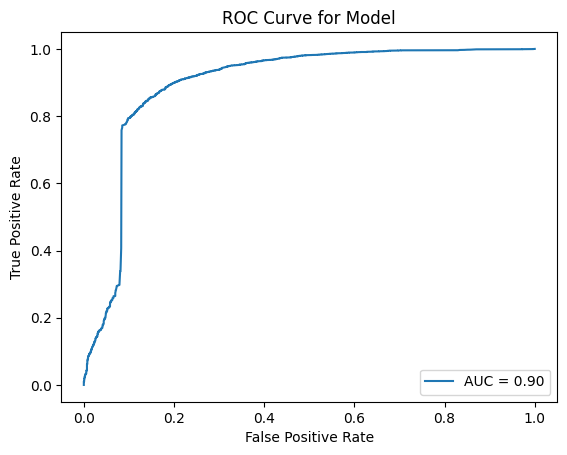

In [62]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Get predicted probabilities for the test set
ptest = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, ptest)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

plt.title('ROC Curve for Model')
plt.show()


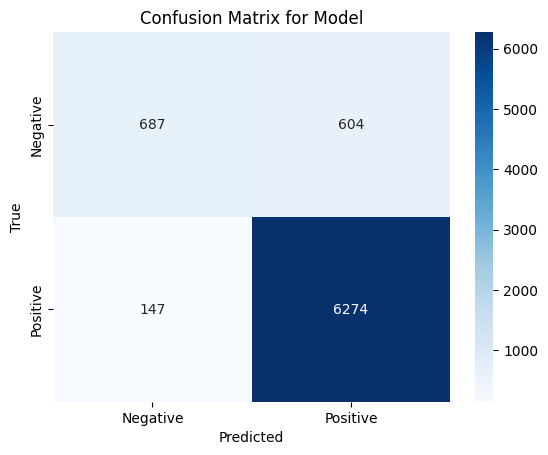

In [63]:
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Model')
plt.show()